In [177]:
# import libraries

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go

from matplotlib import rcParams
from collections import Counter
from pandas_profiling import ProfileReport
#from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [278]:
# Reading the TripAdvisor European Restaurants dataset
restaurants_df = pd.read_csv("/Users/harooniqbal/Desktop/new/NEU_SushmithaJogula/Semester3/DSEM&T/Project/tripadvisor_european_restaurants.csv")
restaurants_df.head()

/Users/harooniqbal/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


In [138]:
# Dataframe information
restaurants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

In [139]:
#Dataframe description
restaurants_df.describe()

,latitude,longitude,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere
count,1.067607e+06,1.067607e+06,593832.000000,593832.000000,593832.000000,986761.000000,1.031162e+06,988204.000000,988204.000000,988204.000000,988204.000000,988204.000000,988204.000000,599325.000000,604287.000000,602692.000000,261785.000000
mean,4.656718e+01,5.838040e+00,6.327081,62.023282,7.630754,4.035943,1.028890e+02,44.563415,24.653440,10.490516,4.109302,2.355306,2.954850,4.104179,4.067245,3.982897,3.933682
std,5.882611e+00,8.639410e+00,0.966734,30.538134,2.550128,0.713694,2.672415e+02,148.728179,89.850801,35.512256,15.669631,9.352756,11.030069,0.564208,0.581267,0.577605,0.555262
min,2.764031e+01,-7.121809e+01,1.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,4.190986e+01,-8.027315e-01,6.000000,39.000000,6.000000,3.500000,6.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,3.500000,3.500000
50%,4.658510e+01,5.646530e+00,7.000000,58.500000,7.000000,4.000000,2.400000e+01,7.000000,3.000000,2.000000,1.000000,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000
75%,5.140537e+01,1.223767e+01,7.000000,81.500000,7.000000,4.500000,9.300000e+01,26.000000,13.000000,6.000000,2.000000,1.000000,2.000000,4.500000,4.500000,4.500000,4.500000
max,6.994156e+01,3.336942e+01,7.000000,168.000000,15.000000,5.000000,5.240400e+04,15229.000000,9383.000000,4091.000000,2132.000000,1253.000000,1215.000000,5.000000,5.000000,5.000000,5.000000


In [140]:
#shape and data types of the data
print('Shape and Data Types of dataset:')
print(restaurants_df.shape)
print(restaurants_df.dtypes)

#numeric columns
restaurants_df_numeric = restaurants_df.select_dtypes(include=[np.number])
numeric_cols = restaurants_df_numeric.columns.values
print('\n Numeric columns of dataset:')
print(numeric_cols)

#non numeric columns
restaurants_df_non_numeric = restaurants_df.select_dtypes(exclude=[np.number])
non_numeric_cols = restaurants_df_non_numeric.columns.values
print('\n Non-Numeric columns of dataset:')
print(non_numeric_cols)

Shape and Data Types of dataset:
(1083397, 42)
restaurant_link                       object
restaurant_name                       object
original_location                     object
country                               object
region                                object
province                              object
city                                  object
address                               object
latitude                             float64
longitude                            float64
claimed                               object
awards                                object
popularity_detailed                   object
popularity_generic                    object
top_tags                              object
price_level                           object
price_range                           object
meals                                 object
cuisines                              object
special_diets                         object
features                              object
vegetari

In [17]:
#Pandas Profiling Report
profile = ProfileReport(restaurants_df, title='Pandas Profiling Report', explorative=True)
profile.to_file("/Users/harooniqbal/Desktop/new/NEU_SushmithaJogula/Semester3/DSEM&T/Project/pandas_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/harooniqbal/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
/Users/harooniqbal/opt/anaconda3/lib/python3.8/site-packages/missingno/missingno.py:250: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=fontsize)
/Users/harooniqbal/opt/anaconda3/lib/python3.8/site-packages/pandas_profiling/model/missing.py:89: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Count": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The number of FixedLocator locations (7), usually from a call to set_ticks, does

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [141]:
#Visualizing missing Values of the Dataset

<AxesSubplot:>

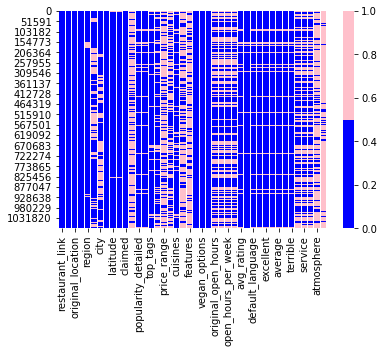

In [142]:
#a) Using Heatmap
cols = restaurants_df.columns[:42] 
colours = ['blue', 'pink'] #blue indicates not missing, pink indicates missing values
sns.heatmap(restaurants_df[cols].isnull(), cmap=sns.color_palette(colours))
#sns.heatmap(restaurants_df[cols].isnull())
#sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)

In [143]:
#b) Calculating percentage of missing values in the dataset columns
for col in restaurants_df.columns:
    pct_missing = np.mean(restaurants_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

restaurant_link - 0%
restaurant_name - 0%
original_location - 0%
country - 0%
region - 5%
province - 31%
city - 37%
address - 0%
latitude - 1%
longitude - 1%
claimed - 0%
awards - 76%
popularity_detailed - 9%
popularity_generic - 9%
top_tags - 10%
price_level - 26%
price_range - 72%
meals - 41%
cuisines - 16%
special_diets - 69%
features - 71%
vegetarian_friendly - 0%
vegan_options - 0%
gluten_free - 0%
original_open_hours - 45%
open_days_per_week - 45%
open_hours_per_week - 45%
working_shifts_per_week - 45%
avg_rating - 9%
total_reviews_count - 5%
default_language - 9%
reviews_count_in_default_language - 9%
excellent - 9%
very_good - 9%
average - 9%
poor - 9%
terrible - 9%
food - 45%
service - 44%
value - 44%
atmosphere - 76%
keywords - 91%


<AxesSubplot:>

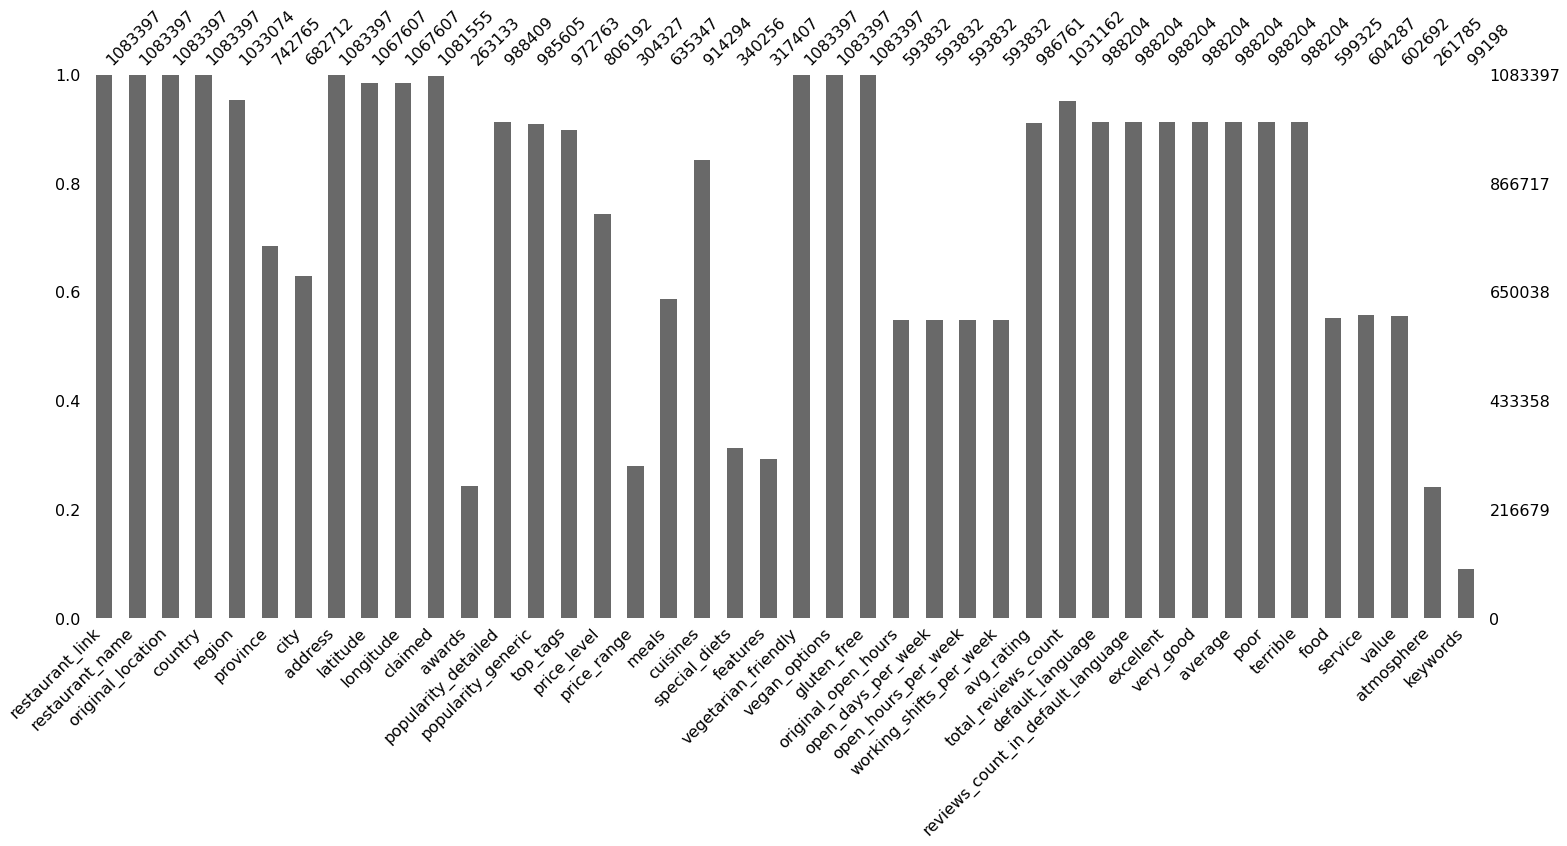

In [144]:
#c) Using Missingno library

import missingno as msno

#bar chart of missing values
msno.bar(restaurants_df)

<AxesSubplot:>

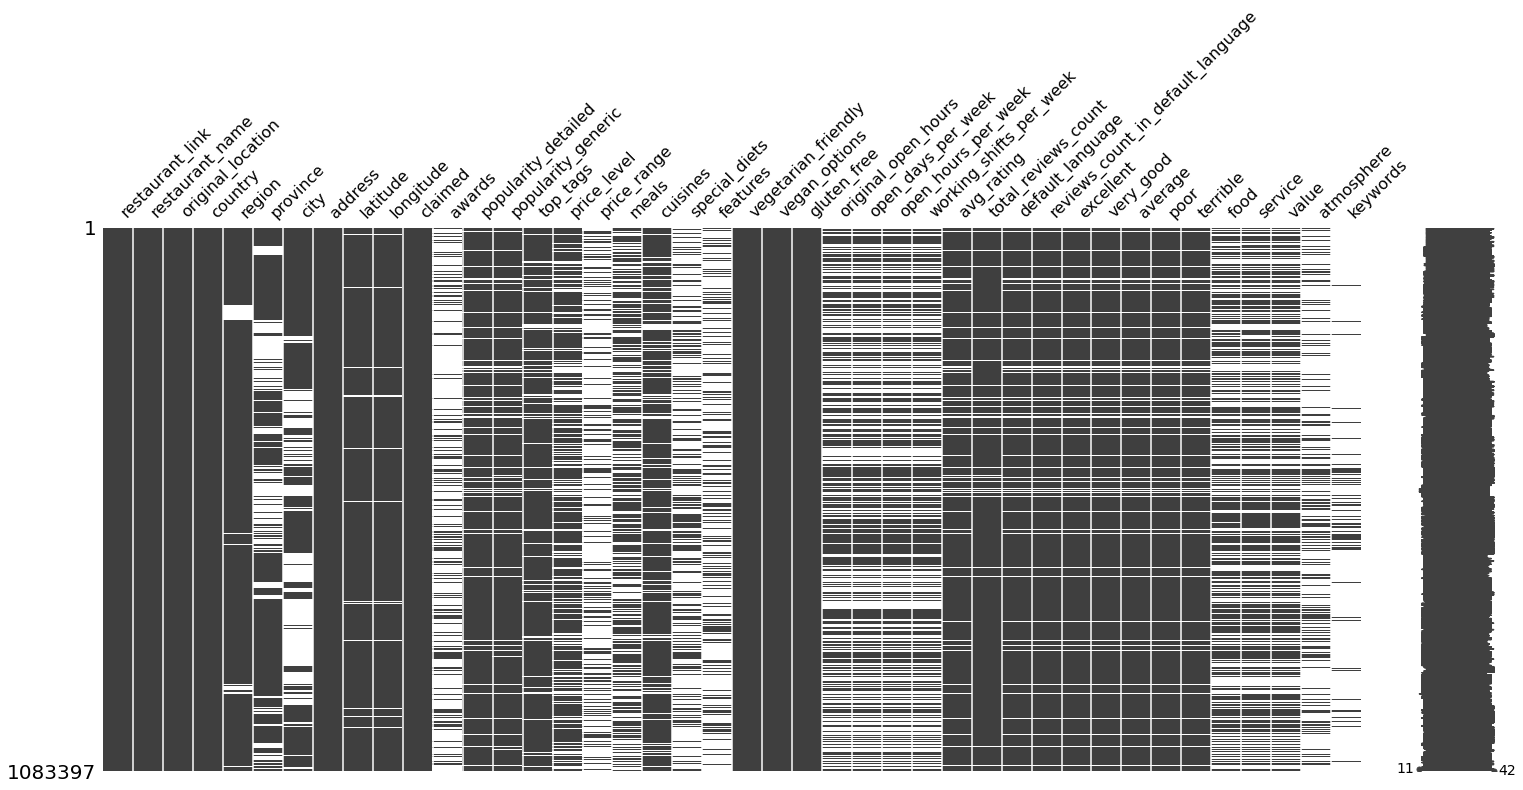

In [145]:
#Matrix plot of missing values
msno.matrix(restaurants_df)

<AxesSubplot:>

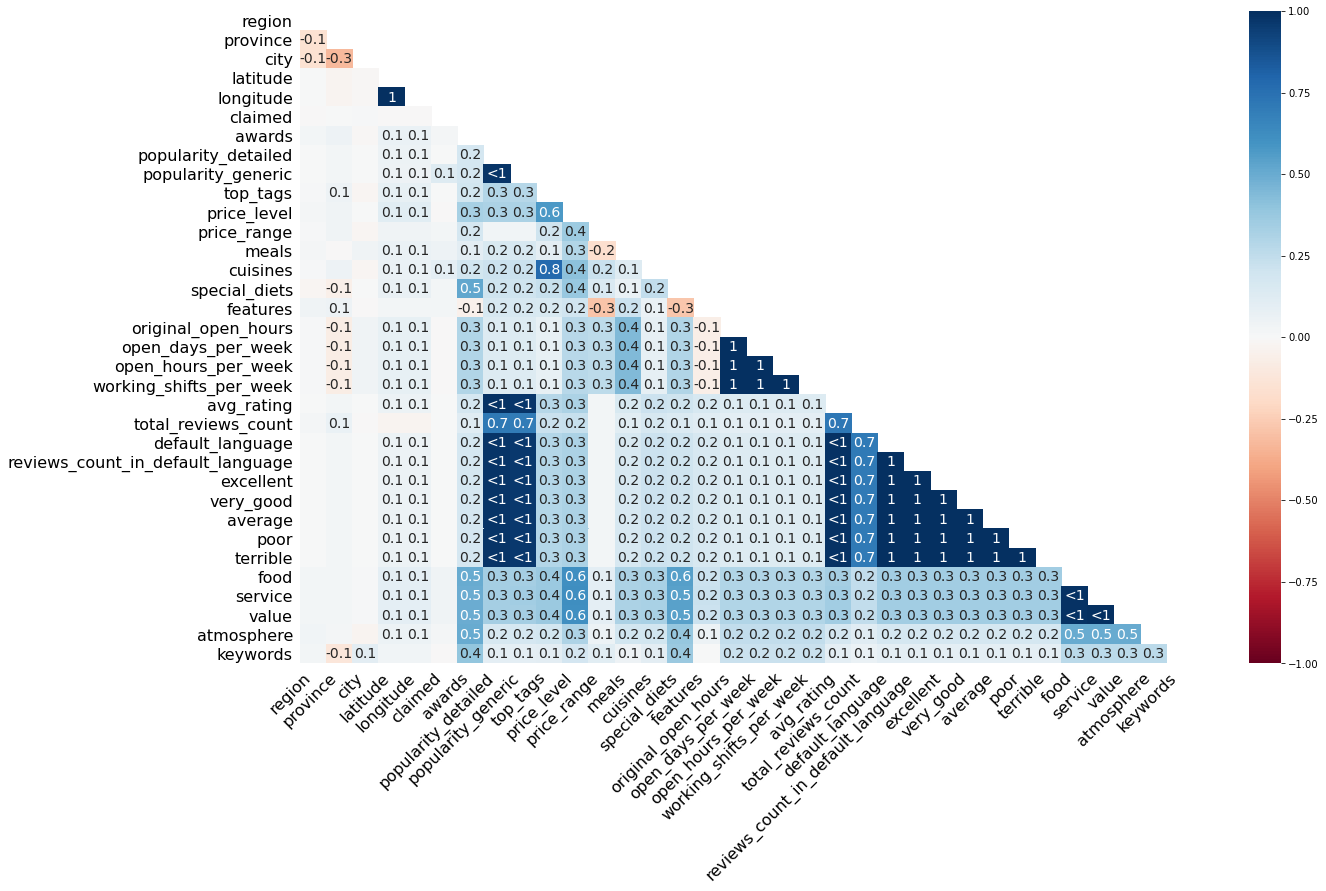

In [146]:
#Heatmap of missing values
msno.heatmap(restaurants_df)

In [147]:
#Initial Data Cleaning

In [279]:
#Step 1: removing columns not required
restaurants_df.drop(['restaurant_link','terrible','poor','average','very_good','excellent','reviews_count_in_default_language','default_language','original_location', 'latitude', 'longitude', 'price_level', 'original_open_hours', 'working_shifts_per_week'], axis = 1, inplace = True)

In [149]:
restaurants_df

,restaurant_name,country,region,province,city,address,claimed,awards,popularity_detailed,popularity_generic,...,gluten_free,open_days_per_week,open_hours_per_week,avg_rating,total_reviews_count,food,service,value,atmosphere,keywords
0,Le 147,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",Claimed,NaN,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,...,N,NaN,NaN,4.0,36.0,4.0,4.5,4.0,NaN,NaN
1,Le Saint Jouvent,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",Unclaimed,NaN,#2 of 2 Restaurants in Saint-Jouvent,#2 of 2 places to eat in Saint-Jouvent,...,N,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN
2,Au Bout du Pont,France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",Claimed,NaN,#1 of 1 Restaurant in Rivarennes,#1 of 1 places to eat in Rivarennes,...,N,NaN,NaN,5.0,13.0,NaN,NaN,NaN,NaN,NaN
3,Le Relais de Naiade,France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",Claimed,NaN,#1 of 1 Restaurant in Lacelle,#1 of 1 places to eat in Lacelle,...,N,NaN,NaN,4.0,34.0,4.5,4.5,4.5,NaN,NaN
4,Relais Du MontSeigne,France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",Unclaimed,NaN,#1 of 1 Restaurant in Saint-Laurent-de-Levezou,#1 of 1 places to eat in Saint-Laurent-de-Levezou,...,N,NaN,NaN,4.5,11.0,4.5,4.5,4.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083392,Complex Popas Pacurari,Romania,Northeast Romania,Iasi County,NaN,"Soseaua Pacurari, Valea Lupului 707410 Romania",Unclaimed,NaN,#1 of 1 Restaurant in Valea Lupului,#1 of 1 places to eat in Valea Lupului,...,N,7.0,84.0,2.5,2.0,NaN,NaN,NaN,NaN,NaN
1083393,Casa Pastravarului DORIPESCO,Romania,Transylvania,Brasov County,Apata,"DN 13 Judetul Kilometrul 33 Maierus, Apata 507...",Claimed,NaN,#1 of 1 Restaurant in Apata,#1 of 1 places to eat in Apata,...,N,7.0,98.0,2.0,6.0,NaN,NaN,NaN,NaN,NaN
1083394,Hanul Tentea,Romania,Transylvania,Maramures County,Sacel,"DN17C, Sacel Romania",Unclaimed,NaN,#1 of 1 Restaurant in Sacel,#1 of 1 places to eat in Sacel,...,N,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN
1083395,Casa Paduraru,Romania,Southern Romania,Arges County,NaN,"Sat. Argeselu Numarul 432, Maracineni 117450 R...",Claimed,NaN,NaN,NaN,...,N,5.0,55.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [280]:
#Step 2: Rename columns for easy understanding and usage
restaurants_df = restaurants_df.rename(columns={'claimed':'claimed_by_tripadvisor','open_days_per_week':'weekly_working_days','open_hours_per_week':'weekly_working_hours', 'food':'food_rating', 'service':'service_rating', 'value':'value_rating', 'atmosphere':'atmosphere_rating'})

In [151]:
restaurants_df

,restaurant_name,country,region,province,city,address,claimed_by_tripadvisor,awards,popularity_detailed,popularity_generic,...,gluten_free,weekly_working_days,weekly_working_hours,avg_rating,total_reviews_count,food_rating,service_rating,value_rating,atmosphere_rating,keywords
0,Le 147,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",Claimed,NaN,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,...,N,NaN,NaN,4.0,36.0,4.0,4.5,4.0,NaN,NaN
1,Le Saint Jouvent,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",Unclaimed,NaN,#2 of 2 Restaurants in Saint-Jouvent,#2 of 2 places to eat in Saint-Jouvent,...,N,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN
2,Au Bout du Pont,France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",Claimed,NaN,#1 of 1 Restaurant in Rivarennes,#1 of 1 places to eat in Rivarennes,...,N,NaN,NaN,5.0,13.0,NaN,NaN,NaN,NaN,NaN
3,Le Relais de Naiade,France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",Claimed,NaN,#1 of 1 Restaurant in Lacelle,#1 of 1 places to eat in Lacelle,...,N,NaN,NaN,4.0,34.0,4.5,4.5,4.5,NaN,NaN
4,Relais Du MontSeigne,France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",Unclaimed,NaN,#1 of 1 Restaurant in Saint-Laurent-de-Levezou,#1 of 1 places to eat in Saint-Laurent-de-Levezou,...,N,NaN,NaN,4.5,11.0,4.5,4.5,4.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083392,Complex Popas Pacurari,Romania,Northeast Romania,Iasi County,NaN,"Soseaua Pacurari, Valea Lupului 707410 Romania",Unclaimed,NaN,#1 of 1 Restaurant in Valea Lupului,#1 of 1 places to eat in Valea Lupului,...,N,7.0,84.0,2.5,2.0,NaN,NaN,NaN,NaN,NaN
1083393,Casa Pastravarului DORIPESCO,Romania,Transylvania,Brasov County,Apata,"DN 13 Judetul Kilometrul 33 Maierus, Apata 507...",Claimed,NaN,#1 of 1 Restaurant in Apata,#1 of 1 places to eat in Apata,...,N,7.0,98.0,2.0,6.0,NaN,NaN,NaN,NaN,NaN
1083394,Hanul Tentea,Romania,Transylvania,Maramures County,Sacel,"DN17C, Sacel Romania",Unclaimed,NaN,#1 of 1 Restaurant in Sacel,#1 of 1 places to eat in Sacel,...,N,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN
1083395,Casa Paduraru,Romania,Southern Romania,Arges County,NaN,"Sat. Argeselu Numarul 432, Maracineni 117450 R...",Claimed,NaN,NaN,NaN,...,N,5.0,55.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [152]:
restaurants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 28 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   restaurant_name         1083397 non-null  object 
 1   country                 1083397 non-null  object 
 2   region                  1033074 non-null  object 
 3   province                742765 non-null   object 
 4   city                    682712 non-null   object 
 5   address                 1083397 non-null  object 
 6   claimed_by_tripadvisor  1081555 non-null  object 
 7   awards                  263133 non-null   object 
 8   popularity_detailed     988409 non-null   object 
 9   popularity_generic      985605 non-null   object 
 10  top_tags                972763 non-null   object 
 11  price_range             304327 non-null   object 
 12  meals                   635347 non-null   object 
 13  cuisines                914294 non-null   object 
 14  sp

In [281]:
#Step 3: Cleaning data
restaurants_df['region'] = restaurants_df['region'].replace('',np.NaN)
restaurants_df['province'] = restaurants_df['province'].replace('',np.NaN)
restaurants_df['city'] = restaurants_df['city'].replace('',np.NaN)
restaurants_df['claimed_by_tripadvisor'] = restaurants_df['claimed_by_tripadvisor'].replace('',np.NaN)
#restaurants_df['awards'] = restaurants_df['awards'].replace('',np.NaN)
restaurants_df['popularity_detailed'] = restaurants_df['popularity_detailed'].replace('',np.NaN)
restaurants_df['popularity_generic'] = restaurants_df['popularity_generic'].replace('',np.NaN)
restaurants_df['top_tags'] = restaurants_df['top_tags'].replace('',np.NaN)
#restaurants_df['price_range'] = restaurants_df['price_range'].replace('',np.NaN)
#restaurants_df['meals'] = restaurants_df['meals'].replace('',np.NaN)
#restaurants_df['cuisines'] = restaurants_df['cuisines'].replace('',np.NaN)
#restaurants_df['cuisines'] = restaurants_df['cuisines'].replace('nan',np.NaN)
restaurants_df['special_diets'] = restaurants_df['special_diets'].replace('',np.NaN)
restaurants_df['features'] = restaurants_df['features'].replace('',np.NaN)
restaurants_df['keywords'] = restaurants_df['keywords'].replace('',np.NaN)
restaurants_df['food_rating'] = restaurants_df['food_rating'].replace(np.NaN,0)
restaurants_df['service_rating'] = restaurants_df['service_rating'].replace(np.NaN,0)
restaurants_df['value_rating'] = restaurants_df['value_rating'].replace(np.NaN,0)
restaurants_df['atmosphere_rating'] = restaurants_df['atmosphere_rating'].replace(np.NaN,0)
restaurants_df['weekly_working_days'] = restaurants_df['weekly_working_days'].replace(np.NaN,0)
restaurants_df['weekly_working_hours'] = restaurants_df['weekly_working_hours'].replace(np.NaN,0)

In [282]:
# Viewing all null values across columns
restaurants_df.isnull().sum()

restaurant_name                0
country                        0
region                     50323
province                  340632
city                      400685
address                        0
claimed_by_tripadvisor      1842
awards                    820264
popularity_detailed        94988
popularity_generic         97792
top_tags                  110634
price_range               779070
meals                     448050
cuisines                  169103
special_diets             743141
features                  765990
vegetarian_friendly            0
vegan_options                  0
gluten_free                    0
weekly_working_days            0
weekly_working_hours           0
avg_rating                 96636
total_reviews_count        52235
food_rating                    0
service_rating                 0
value_rating                   0
atmosphere_rating              0
keywords                  984199
dtype: int64

In [283]:
#Step 4: Changing categorical features for statistical computation
restaurants_df.claimed_by_tripadvisor = restaurants_df.claimed_by_tripadvisor.apply(lambda x: '1' if str(x)=='Claimed' else '0')
restaurants_df.vegetarian_friendly = restaurants_df.vegetarian_friendly.apply(lambda x: '0' if str(x)=='N' else '1')
restaurants_df.vegan_options = restaurants_df.vegan_options.apply(lambda x: '0' if str(x)=='N' else '1')
restaurants_df.gluten_free = restaurants_df.gluten_free.apply(lambda x: '0' if str(x)=='N' else '1')

In [156]:
restaurants_df

,restaurant_name,country,region,province,city,address,claimed_by_tripadvisor,awards,popularity_detailed,popularity_generic,...,gluten_free,weekly_working_days,weekly_working_hours,avg_rating,total_reviews_count,food_rating,service_rating,value_rating,atmosphere_rating,keywords
0,Le 147,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",1,NaN,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,...,0,0.0,0.0,4.0,36.0,4.0,4.5,4.0,0.0,NaN
1,Le Saint Jouvent,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",0,NaN,#2 of 2 Restaurants in Saint-Jouvent,#2 of 2 places to eat in Saint-Jouvent,...,0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,NaN
2,Au Bout du Pont,France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",1,NaN,#1 of 1 Restaurant in Rivarennes,#1 of 1 places to eat in Rivarennes,...,0,0.0,0.0,5.0,13.0,0.0,0.0,0.0,0.0,NaN
3,Le Relais de Naiade,France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",1,NaN,#1 of 1 Restaurant in Lacelle,#1 of 1 places to eat in Lacelle,...,0,0.0,0.0,4.0,34.0,4.5,4.5,4.5,0.0,NaN
4,Relais Du MontSeigne,France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",0,NaN,#1 of 1 Restaurant in Saint-Laurent-de-Levezou,#1 of 1 places to eat in Saint-Laurent-de-Levezou,...,0,0.0,0.0,4.5,11.0,4.5,4.5,4.5,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083392,Complex Popas Pacurari,Romania,Northeast Romania,Iasi County,NaN,"Soseaua Pacurari, Valea Lupului 707410 Romania",0,NaN,#1 of 1 Restaurant in Valea Lupului,#1 of 1 places to eat in Valea Lupului,...,0,7.0,84.0,2.5,2.0,0.0,0.0,0.0,0.0,NaN
1083393,Casa Pastravarului DORIPESCO,Romania,Transylvania,Brasov County,Apata,"DN 13 Judetul Kilometrul 33 Maierus, Apata 507...",1,NaN,#1 of 1 Restaurant in Apata,#1 of 1 places to eat in Apata,...,0,7.0,98.0,2.0,6.0,0.0,0.0,0.0,0.0,NaN
1083394,Hanul Tentea,Romania,Transylvania,Maramures County,Sacel,"DN17C, Sacel Romania",0,NaN,#1 of 1 Restaurant in Sacel,#1 of 1 places to eat in Sacel,...,0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,NaN
1083395,Casa Paduraru,Romania,Southern Romania,Arges County,NaN,"Sat. Argeselu Numarul 432, Maracineni 117450 R...",1,NaN,NaN,NaN,...,0,5.0,55.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
# restaurants_df.awards = restaurants_df.awards.astype(str)
# # for award in restaurants_df['awards']:
# #     if award != np.NaN:
# #         restaurants_df['Number of Awards'] = restaurants_df['awards'].apply(lambda x: len(x.split(',')))
# #     else:
# #         restaurants_df['Number of Awards'] = 0
# num_awards = []
# for award in restaurants_df.loc[:,'awards']: 
#     if award == np.NaN:
#         num_awards.append(0)
#     else:
#         num_awards.append(restaurants_df['awards'].apply(lambda x: len(x.split(','))))
# restaurants_df['Number of Awards'] = num_awards  



#Adding number of awards measure
restaurants_df.awards = restaurants_df.awards.astype(str)
num_awards = []
for award in restaurants_df.loc[:,'awards']: 
    if award is not np.NaN and award != 'nan':
        num_awards.append(restaurants_df['awards'].apply(lambda x: len(x.split(','))))
        
    else:
        num_awards.append(0)
restaurants_df['Number of Awards'] = num_awards   
restaurants_df['Number of Awards'] = restaurants_df['Number of Awards'].astype(int) 

In [ ]:
restaurants_df

In [61]:
#df2 = restaurants_df[restaurants_df['Number of Awards'] ==2]
#df2

,restaurant_name,country,region,province,city,address,claimed_by_tripadvisor,awards,popularity_detailed,popularity_generic,...,weekly_working_hours,avg_rating,total_reviews_count,food_rating,service_rating,value_rating,atmosphere_rating,keywords,awards_count,Number of Awards
5,L'Auberge Du Vieux Crozet,France,Auvergne-Rhone-Alpes,Loire,Le Crozet,59 place du Puits ancienne adresse le Bourg re...,1,"Travellers' Choice, Certificate of Excellence ...",#1 of 1 Restaurant in Le Crozet,#1 of 1 places to eat in Le Crozet,...,53.5,4.5,64.0,4.5,4.5,4.5,NaN,NaN,2,2
18,La terrasse,France,Provence-Alpes-Cote d'Azur,Var,Rocbaron,"10 rue des Faysonnes, 83136 Rocbaron France",0,"Certificate of Excellence 2018, Certificate of...",#4 of 10 Restaurants in Rocbaron,#4 of 12 places to eat in Rocbaron,...,NaN,4.0,79.0,4.5,4.0,4.5,NaN,NaN,2,2
19,Cafe Restaurant le Papareil,France,Provence-Alpes-Cote d'Azur,Var,Rocbaron,"quartier Fray Redon, 83136 Rocbaron France",1,"Certificate of Excellence 2018, Certificate of...",#3 of 10 Restaurants in Rocbaron,#3 of 12 places to eat in Rocbaron,...,94.0,4.5,73.0,4.5,4.5,4.5,NaN,NaN,2,2
37,Aux 2 mousses,France,Auvergne-Rhone-Alpes,Savoie,Lanslebourg Mont Cenis,Lieu Dit Plan des Champs Residence Le Criteriu...,1,"Travellers' Choice, Certificate of Excellence ...",#12 of 26 Restaurants in Lanslebourg Mont Cenis,#12 of 28 places to eat in Lanslebourg Mont Cenis,...,NaN,4.5,53.0,4.5,4.5,4.0,NaN,NaN,2,2
57,Laiterie Col Bayard,France,Provence-Alpes-Cote d'Azur,Hautes-Alpes,Saint-Bonnet en Champsaur,"Route Nationale 85 Laye, 05500 Saint-Bonnet en...",0,"Certificate of Excellence 2016, Certificate of...",#3 of 6 Restaurants in Saint-Bonnet en Champsaur,#3 of 7 places to eat in Saint-Bonnet en Champ...,...,NaN,4.0,104.0,4.5,4.0,4.0,4.0,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083288,Bistroteca Baum & Pension Kokel,Romania,Transylvania,Sibiu County,Dumbraveni,"Tudor Vladimirescu 49, Dumbraveni 555500 Romania",1,"Travellers' Choice, Certificate of Excellence ...",#1 of 1 Restaurant in Dumbraveni,#1 of 1 places to eat in Dumbraveni,...,112.0,4.5,66.0,4.0,4.0,4.0,NaN,"beef, wonderful place, place to eat, eat somet...",2,2
1083303,Barrels Pub Mamaia,Romania,Southeast Romania,Constanta County,NaN,"Zona Butoaie, Mamaia, Constanta 900001 Romania",1,"Travellers' Choice, Certificate of Excellence ...",#3 of 35 Restaurants in Mamaia,#3 of 45 places to eat in Mamaia,...,89.0,4.0,126.0,4.0,3.5,3.5,NaN,"burger, bread rolls, chicken, cheesecake, fries",2,2
1083313,Blue Acqua Restaurant - Faleza Mamaia,Romania,Southeast Romania,Constanta County,NaN,Bulevardul Mamaia Zona Hotel Rex - Majestic - ...,1,"Travellers' Choice, Certificate of Excellence ...",#1 of 35 Restaurants in Mamaia,#1 of 45 places to eat in Mamaia,...,85.0,4.5,207.0,4.0,3.5,4.0,NaN,"fish, paella, tort, soups, octopus",2,2
1083376,Restaurant Radsor,Romania,Transylvania,Brasov County,Rasnov,"Ion Creanga 2, Rasnov 500400 Romania",1,"Certificate of Excellence 2019, Certificate of...",#4 of 14 Restaurants in Rasnov,#4 of 15 places to eat in Rasnov,...,NaN,4.0,87.0,4.5,4.5,4.5,NaN,NaN,2,2


In [255]:
#Cleaning price range and Adding average price measure

min_price = []
max_price = []
restaurants_df.price_range = restaurants_df.price_range.astype(str)
restaurants_df.drop(restaurants_df[restaurants_df['price_range'].str.contains('CHF')].index, inplace = True)
restaurants_df['price_range'] = restaurants_df['price_range'].str.replace('€','')
restaurants_df['price_range'] = restaurants_df['price_range'].str.replace(',','')
for price in restaurants_df.loc[:,'price_range']: 
    #print(type(price))
    #print(price)
    if price is np.NaN or price == 'nan':
        min_price.append(0)
        max_price.append(0)
        
    else:
        price_range_split = price.split("-",1)
        min_price.append(price_range_split[0])
        max_price.append(price_range_split[1])
        
restaurants_df["Minimum Price"] = min_price
restaurants_df["Maximum Price"] = max_price
restaurants_df["Minimum Price"] = restaurants_df["Minimum Price"].astype(float)
restaurants_df["Maximum Price"] = restaurants_df["Maximum Price"].astype(float)
restaurants_df["Average Price"] = restaurants_df[['Minimum Price', 'Maximum Price']].mean(axis=1)

In [159]:
restaurants_df

,restaurant_name,country,region,province,city,address,claimed_by_tripadvisor,awards,popularity_detailed,popularity_generic,...,avg_rating,total_reviews_count,food_rating,service_rating,value_rating,atmosphere_rating,keywords,Minimum Price,Maximum Price,Average Price
0,Le 147,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",1,NaN,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,...,4.0,36.0,4.0,4.5,4.0,0.0,NaN,0.0,0.0,0.0
1,Le Saint Jouvent,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",0,NaN,#2 of 2 Restaurants in Saint-Jouvent,#2 of 2 places to eat in Saint-Jouvent,...,4.0,5.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
2,Au Bout du Pont,France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",1,NaN,#1 of 1 Restaurant in Rivarennes,#1 of 1 places to eat in Rivarennes,...,5.0,13.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
3,Le Relais de Naiade,France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",1,NaN,#1 of 1 Restaurant in Lacelle,#1 of 1 places to eat in Lacelle,...,4.0,34.0,4.5,4.5,4.5,0.0,NaN,0.0,0.0,0.0
4,Relais Du MontSeigne,France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",0,NaN,#1 of 1 Restaurant in Saint-Laurent-de-Levezou,#1 of 1 places to eat in Saint-Laurent-de-Levezou,...,4.5,11.0,4.5,4.5,4.5,0.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083392,Complex Popas Pacurari,Romania,Northeast Romania,Iasi County,NaN,"Soseaua Pacurari, Valea Lupului 707410 Romania",0,NaN,#1 of 1 Restaurant in Valea Lupului,#1 of 1 places to eat in Valea Lupului,...,2.5,2.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
1083393,Casa Pastravarului DORIPESCO,Romania,Transylvania,Brasov County,Apata,"DN 13 Judetul Kilometrul 33 Maierus, Apata 507...",1,NaN,#1 of 1 Restaurant in Apata,#1 of 1 places to eat in Apata,...,2.0,6.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
1083394,Hanul Tentea,Romania,Transylvania,Maramures County,Sacel,"DN17C, Sacel Romania",0,NaN,#1 of 1 Restaurant in Sacel,#1 of 1 places to eat in Sacel,...,3.0,2.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
1083395,Casa Paduraru,Romania,Southern Romania,Arges County,NaN,"Sat. Argeselu Numarul 432, Maracineni 117450 R...",1,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2.0,8.0,5.0


In [160]:
# #col = restaurants_df.loc[: , "min_price":"max_price"]
# #restaurants_df['avg_price'] = col.mean(axis=1)
# restaurants_df['avg_price'] = restaurants_df[['min_price', 'max_price']].mean(axis=1)


In [57]:
restaurants_df

,restaurant_name,country,region,province,city,address,claimed_by_tripadvisor,awards,popularity_detailed,popularity_generic,...,terrible,food_rating,service_rating,value_rating,atmosphere_rating,keywords,awards_count,min_price,max_price,avg_price
0,Le 147,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",1,nan,#1 of 2 Restaurants in Saint-Jouvent,#1 of 2 places to eat in Saint-Jouvent,...,0.0,4.0,4.5,4.0,NaN,NaN,1,0,0,NaN
1,Le Saint Jouvent,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",0,nan,#2 of 2 Restaurants in Saint-Jouvent,#2 of 2 places to eat in Saint-Jouvent,...,0.0,NaN,NaN,NaN,NaN,NaN,1,0,0,NaN
2,Au Bout du Pont,France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",1,nan,#1 of 1 Restaurant in Rivarennes,#1 of 1 places to eat in Rivarennes,...,0.0,NaN,NaN,NaN,NaN,NaN,1,0,0,NaN
3,Le Relais de Naiade,France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",1,nan,#1 of 1 Restaurant in Lacelle,#1 of 1 places to eat in Lacelle,...,0.0,4.5,4.5,4.5,NaN,NaN,1,0,0,NaN
4,Relais Du MontSeigne,France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",0,nan,#1 of 1 Restaurant in Saint-Laurent-de-Levezou,#1 of 1 places to eat in Saint-Laurent-de-Levezou,...,0.0,4.5,4.5,4.5,NaN,NaN,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083392,Complex Popas Pacurari,Romania,Northeast Romania,Iasi County,NaN,"Soseaua Pacurari, Valea Lupului 707410 Romania",0,nan,#1 of 1 Restaurant in Valea Lupului,#1 of 1 places to eat in Valea Lupului,...,1.0,NaN,NaN,NaN,NaN,NaN,1,0,0,NaN
1083393,Casa Pastravarului DORIPESCO,Romania,Transylvania,Brasov County,Apata,"DN 13 Judetul Kilometrul 33 Maierus, Apata 507...",1,nan,#1 of 1 Restaurant in Apata,#1 of 1 places to eat in Apata,...,2.0,NaN,NaN,NaN,NaN,NaN,1,0,0,NaN
1083394,Hanul Tentea,Romania,Transylvania,Maramures County,Sacel,"DN17C, Sacel Romania",0,nan,#1 of 1 Restaurant in Sacel,#1 of 1 places to eat in Sacel,...,1.0,NaN,NaN,NaN,NaN,NaN,1,0,0,NaN
1083395,Casa Paduraru,Romania,Southern Romania,Arges County,NaN,"Sat. Argeselu Numarul 432, Maracineni 117450 R...",1,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2,8,NaN


In [161]:
#Graphical Data Exploration and Analysis

<ipython-input-256-9d673b70b424>:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


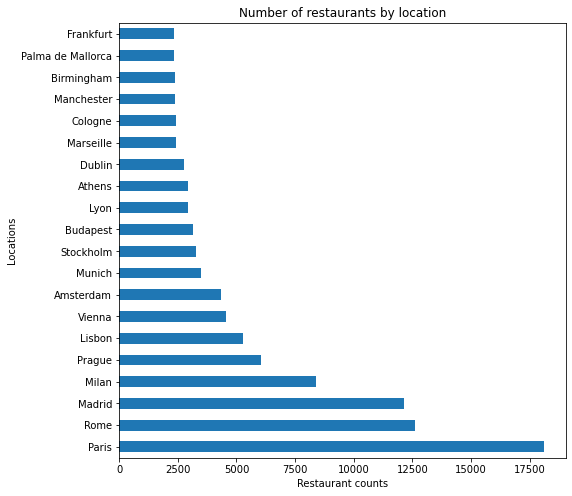

In [256]:
#1. Most Popular cities for restaurants in Europe

plt.figure(figsize = (8,8))
restaurants_df.city.value_counts().nlargest(20).plot(kind='barh')
plt.title("Number of restaurants by location")
plt.xlabel("Restaurant counts")
plt.ylabel("Locations")
plt.show()

/Users/harooniqbal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Count')

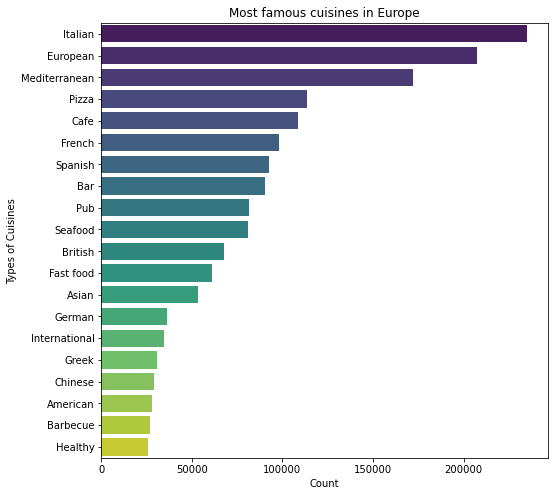

In [258]:
#2. Top Cuisines in European restaurants

#removing null cuisine values
restaurants_df = restaurants_df[restaurants_df.cuisines != 'nan']

restaurants_df['cuisines']=[str(x) for x in restaurants_df['cuisines']]
cuisines=",".join(restaurants_df["cuisines"])
cuisines= [x.strip() for x in cuisines.split(',')]

cuisines=Counter(cuisines)
top_10_cuisines=[x for x in cuisines.most_common(20)]
a,b=map(list,zip(*top_10_cuisines))
plt.figure(figsize=(8,8))
sns.barplot(b,a,palette="viridis")
plt.title("Most famous cuisines in Europe")
plt.ylabel("Types of Cuisines")
plt.xlabel("Count")

<ipython-input-260-a22dd1085152>:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


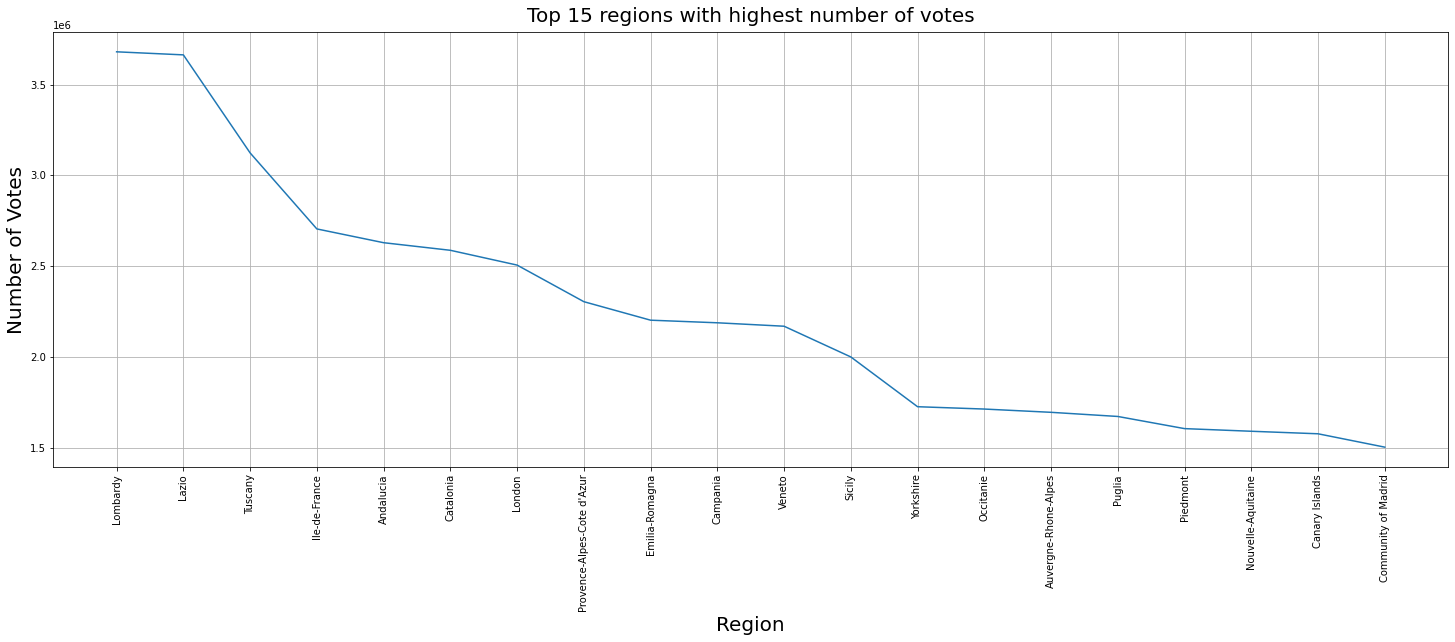

In [260]:
#where are good restaurants located?

temp = restaurants_df.groupby('region')['total_reviews_count'].sum().sort_values(ascending=False)[:20,]
ax = temp.plot(figsize=(25,8), grid=True)
ax.set_xticks(range(len(temp)))
ax.set_xticklabels(temp.index, rotation=90)
ax.set_xlabel('Region', fontsize=20)
ax.set_ylabel('Number of Votes', fontsize=20)
ax.set_title('Top 15 regions with highest number of votes', fontsize=20, pad = 10)
plt.show()

<ipython-input-261-b37a45848b9a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = restaurants_df.groupby('country')['Minimum Price','Maximum Price'].agg([('Cavg','max')])
<ipython-input-261-b37a45848b9a>:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


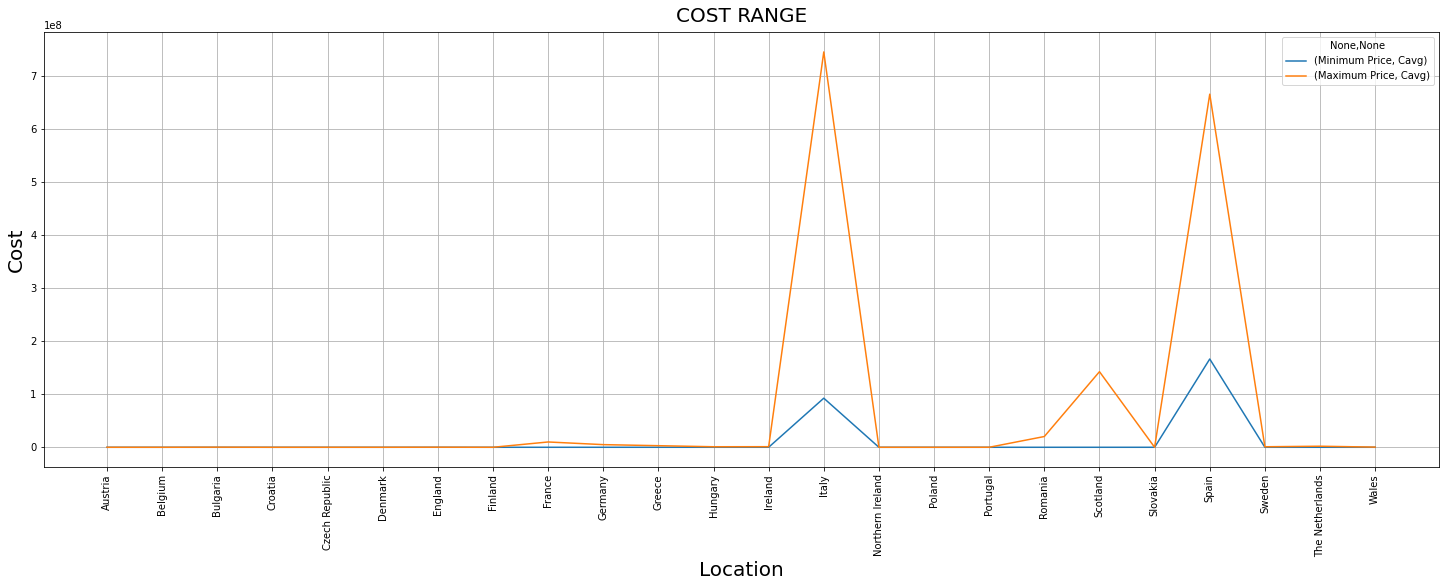

In [261]:
#approx spending in a given country
temp = restaurants_df.groupby('country')['Minimum Price','Maximum Price'].agg([('Cavg','max')])
ax = temp.plot(figsize=(25,8), grid=True)
ax.set_xticks(range(len(temp)))
ax.set_xticklabels(temp.index, rotation=90)
ax.set_xlabel('Location', fontsize=20)
ax.set_ylabel('Cost', fontsize=20)
ax.set_title('COST RANGE', fontsize=20, pad = 10)
plt.show()

KeyboardInterrupt: 

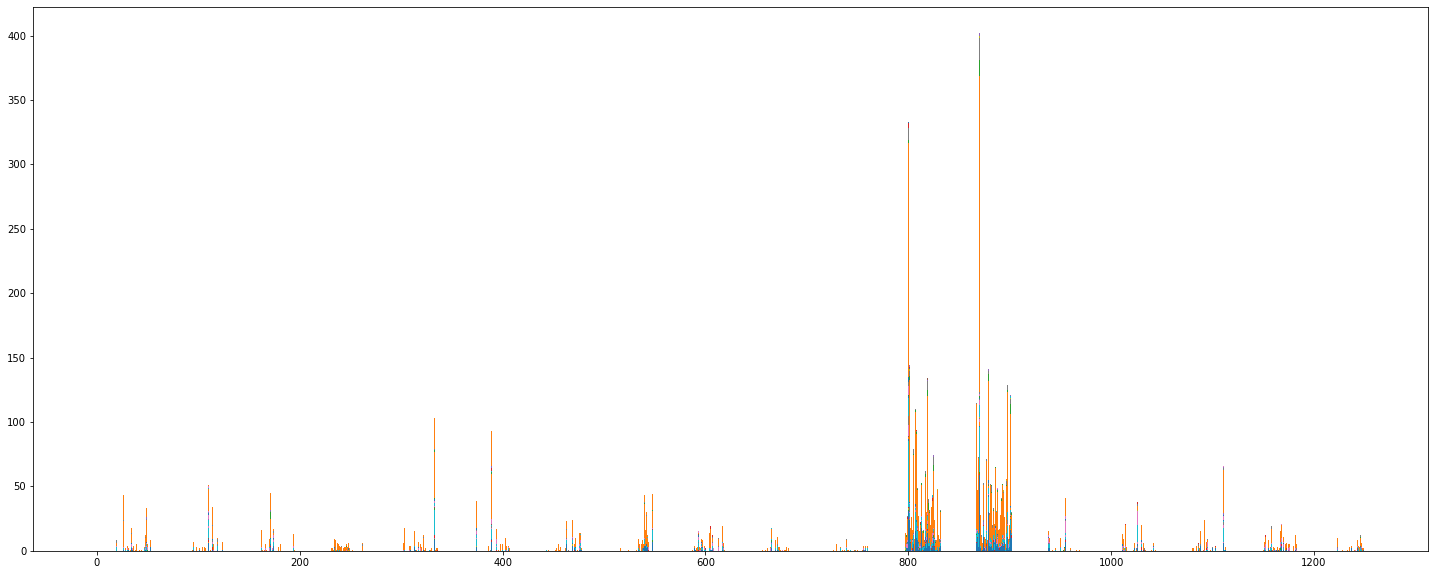

In [265]:
#Distribution of different types of meals across European restaurants
# restaurants_df = restaurants_df[restaurants_df.meals != 'nan']

# restaurants_df['meals']=[str(x) for x in restaurants_df['meals']]
# meals=",".join(restaurants_df["meals"])
# meals= [x.strip() for x in meals.split(',')]

# meals=Counter(meals)

restaurants_df['meals'].str.split(',')

temp = restaurants_df[['province', 'meals']].groupby(['province', 'meals']).size().reset_index()
ax = temp.set_index(['province', 'meals']).unstack(level=1).plot(kind='bar', stacked=True, figsize=(25, 10))
ax.set_title('Restaurant Type Distribution', fontsize=20)
ax.set_xlabel('Locations', fontsize=20)
ax.set_ylabel('Restaurant type and count', fontsize=20)
ax.legend(temp['meals'].unique())
plt.show()

<ipython-input-266-6fe72ce24aa9>:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


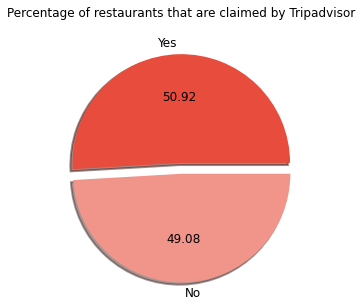

In [266]:
#How does claimed by tripadvisor affect rating?
plt.figure(figsize=(5, 5))
restaurants_df.claimed_by_tripadvisor.value_counts().plot(kind = 'pie', autopct = '%.2f', radius = 1,
                                        colors = ['#E74C3C', '#F1948A'], explode = [0,0.1], 
                                        labels = ['Yes', 'No'], shadow = True,
                                        textprops = dict(size=12), wedgeprops = dict(linewidth=2))
plt.axis('off')
plt.title('Percentage of restaurants that are claimed by Tripadvisor', pad = 10)
plt.show()

<ipython-input-268-0993676d5bba>:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


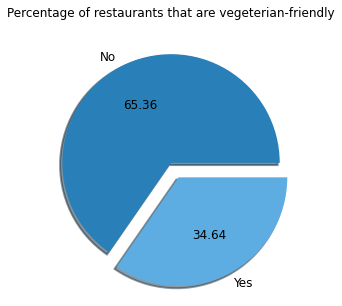

In [268]:
#How does vegetarian_friendly affect rating?
plt.figure(figsize=(5, 5))
restaurants_df.vegetarian_friendly.value_counts().plot(kind = 'pie', autopct = '%.2f', radius = 1,
                                        colors = ['#2980B9', '#5DADE2'], explode = [0,0.15], 
                                        labels = ['No','Yes'], shadow = True,
                                        textprops = dict(size=12), wedgeprops = dict(linewidth=2))
plt.axis('off')
plt.title('Percentage of restaurants that are vegeterian-friendly', pad = 10)
plt.show()


# restaurants_df.vegetarian_friendly = restaurants_df.vegetarian_friendly.apply(lambda x: '0' if str(x)=='N' else '1')
# restaurants_df.vegan_options = restaurants_df.vegan_options.apply(lambda x: '0' if str(x)=='N' else '1')
# restaurants_df.gluten_free 

<ipython-input-271-9a6a6b3766fc>:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


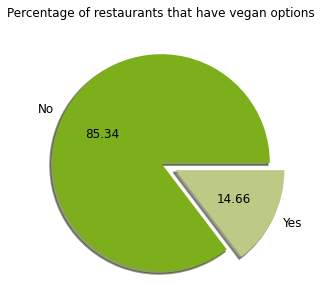

In [271]:
#How does vegan options affect rating?
plt.figure(figsize=(5, 5))
restaurants_df.vegan_options.value_counts().plot(kind = 'pie', autopct = '%.2f', radius = 1,
                                        colors = ['#7dae1b','#bcca85'], explode = [0,0.15], 
                                        labels = ['No','Yes'], shadow = True,
                                        textprops = dict(size=12), wedgeprops = dict(linewidth=2))
plt.axis('off')
plt.title('Percentage of restaurants that have vegan options', pad = 10)
plt.show()

<ipython-input-272-aff93d2d35f1>:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


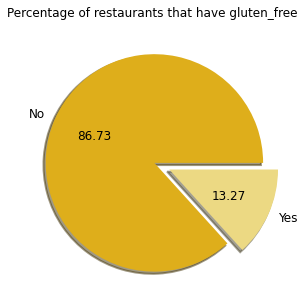

In [272]:
#How does gluten_free  affect rating?
plt.figure(figsize=(5, 5))
restaurants_df.gluten_free.value_counts().plot(kind = 'pie', autopct = '%.2f', radius = 1,
                                        colors = ['#deae1b','#ecd983'], explode = [0,0.15], 
                                        labels = ['No','Yes'], shadow = True,
                                        textprops = dict(size=12), wedgeprops = dict(linewidth=2))
plt.axis('off')
plt.title('Percentage of restaurants that have gluten_free ', pad = 10)
plt.show()

<ipython-input-274-991dd96f3723>:33: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


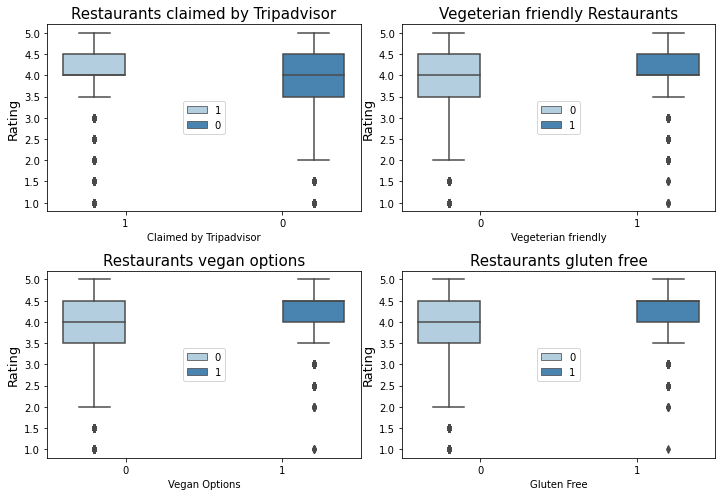

In [274]:
#how rating is affected based on these factors
plt.figure(figsize = (10,7))

plt.subplot(2,2,1)
sns.boxplot(x = 'claimed_by_tripadvisor', y = 'avg_rating', data = restaurants_df, hue = 'claimed_by_tripadvisor', palette="Blues")
plt.title('Restaurants claimed by Tripadvisor', fontsize = 15)
plt.xlabel('Claimed by Tripadvisor')
plt.ylabel('Rating', fontsize = 13)
plt.legend(loc = 'center')

plt.subplot(2,2,2)
sns.boxplot(x = 'vegetarian_friendly', y = 'avg_rating', data = restaurants_df, hue = 'vegetarian_friendly', palette="Blues")
plt.title('Vegeterian friendly Restaurants', fontsize = 15)
plt.xlabel('Vegeterian friendly')
plt.ylabel('Rating', fontsize = 13)
plt.legend(loc = 'center')

plt.subplot(2,2,3)
sns.boxplot(x = 'vegan_options', y = 'avg_rating', data = restaurants_df, hue = 'vegan_options', palette="Blues")
plt.title('Restaurants vegan options', fontsize = 15)
plt.xlabel('Vegan Options')
plt.ylabel('Rating', fontsize = 13)
plt.legend(loc = 'center')

plt.subplot(2,2,4)
sns.boxplot(x = 'gluten_free', y = 'avg_rating', data = restaurants_df, hue = 'gluten_free', palette="Blues")
plt.title('Restaurants gluten free', fontsize = 15)
plt.xlabel('Gluten Free')
plt.ylabel('Rating', fontsize = 13)
plt.legend(loc = 'center')

plt.tight_layout()
plt.show()

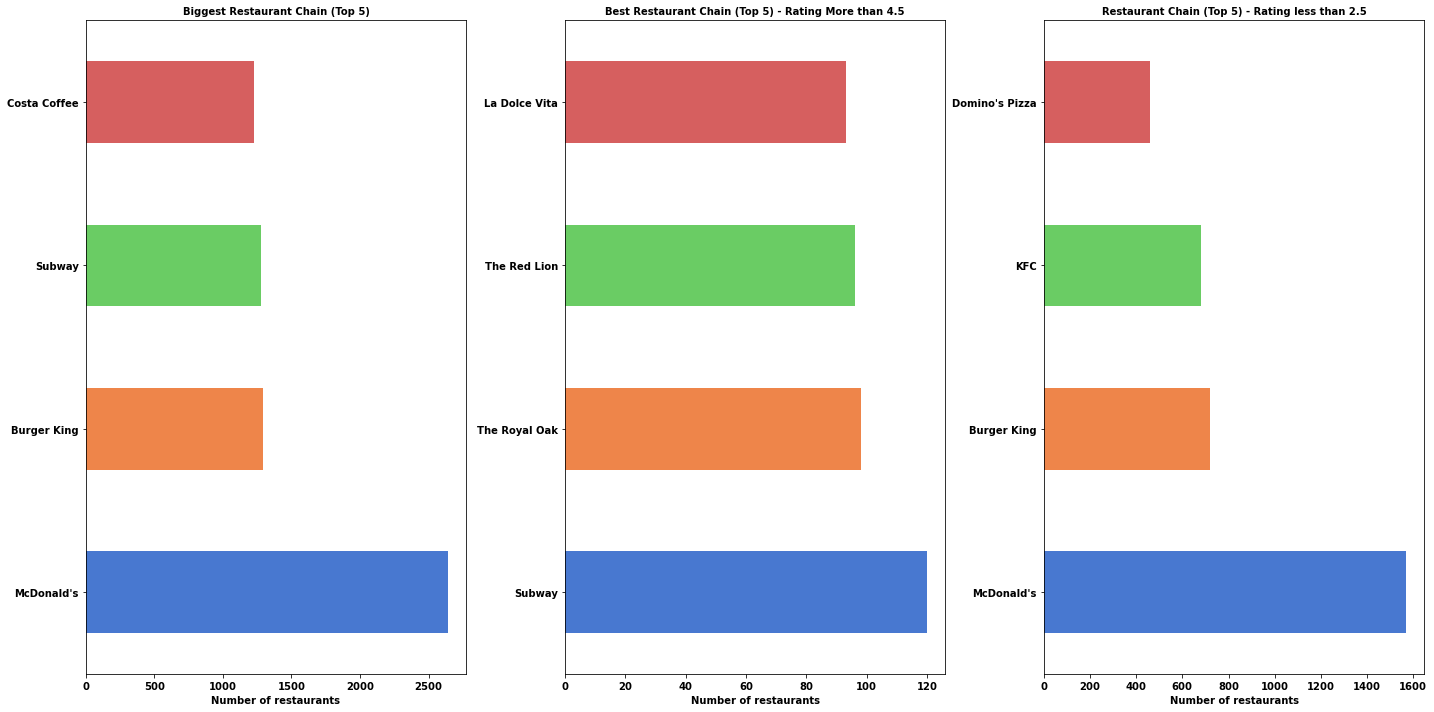

In [277]:
#comparing biggest and best restaurants

plt.rcParams['figure.figsize'] = 20,10
plt.subplot(1,3,1)
restaurants_df.restaurant_name.value_counts().nlargest(4).plot(kind = "barh", color = sns.color_palette("muted"))
plt.xlabel("Number of restaurants",fontsize=10,fontweight='bold')
plt.title("Biggest Restaurant Chain (Top 5)",fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');


plt.subplot(1,3,2)
restaurants_df[restaurants_df['avg_rating']>= 4.5]['restaurant_name'].value_counts().nlargest(4).plot(kind = "barh", color = sns.color_palette("muted"))
plt.xlabel("Number of restaurants",fontsize=10,fontweight='bold')
plt.title("Best Restaurant Chain (Top 5) - Rating More than 4.5",fontsize=10,fontweight='bold')
plt.tight_layout()
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

plt.subplot(1,3,3)
restaurants_df[restaurants_df['avg_rating'] <= 2.5]['restaurant_name'].value_counts().nlargest(4).plot(kind = "barh", color = sns.color_palette("muted"))
plt.xlabel("Number of restaurants",fontsize=10,fontweight='bold')
plt.title("Restaurant Chain (Top 5) - Rating less than 2.5",fontsize=10,fontweight='bold')
plt.tight_layout()
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');